# Analyses of multiple small populations

In [1]:
import pickle
import gzip
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy import stats

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [2]:
%ls ../saved_simulations/

SAMPLED-Results-Large-Neutral_vs_Selection-HIGH_MUTRATE/
small-neutral-1000_MultiSim/
small-selection_0p004-1000_MultiSim/
small-selection_0p01-1000_MultiSim/
small-selection_0p05-1000_MultiSim/
small-selection_0p1-1000_MultiSim/
small-selection_0p15-1000_MultiSim/
small-selection_0p2-1000_MultiSim/
small-selection_0p3-1000_MultiSim/
small-selection_1p5-1000_MultiSim/
small-selection_3-1000_MultiSim/


In [3]:
%%time

prefix = '../saved_simulations/small-selection_3-1000_MultiSim/'
pop_data = []

for i in tqdm(range(1000)):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    pop_data.append(data)
print(len(pop_data))
print(type(pop_data[0]))

100%|██████████| 1000/1000 [00:01<00:00, 699.84it/s]

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1.05 s, sys: 244 ms, total: 1.29 s
Wall time: 1.44 s


## Maximum allele frequencies

In [4]:
%%time
pop_data_MaxAFs = get_max_AFs(pop_data, det_lim=1)

CPU times: user 1.12 s, sys: 24 ms, total: 1.14 s
Wall time: 1.18 s


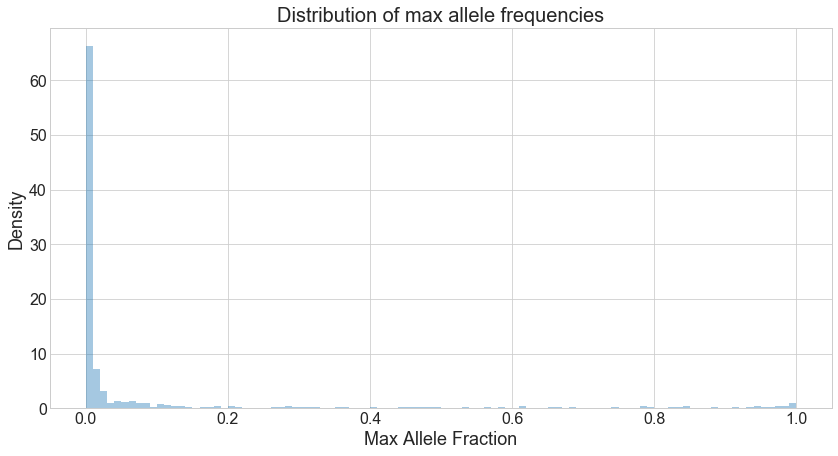

In [5]:
sns.distplot(pop_data_MaxAFs, bins=100, norm_hist=True, kde=False);
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.show()

## Heterogeneity

In [6]:
%%time
pop_data_H = get_heterogeneity(pop_data, det_lim=1)

CPU times: user 1.08 s, sys: 13.1 ms, total: 1.09 s
Wall time: 1.11 s


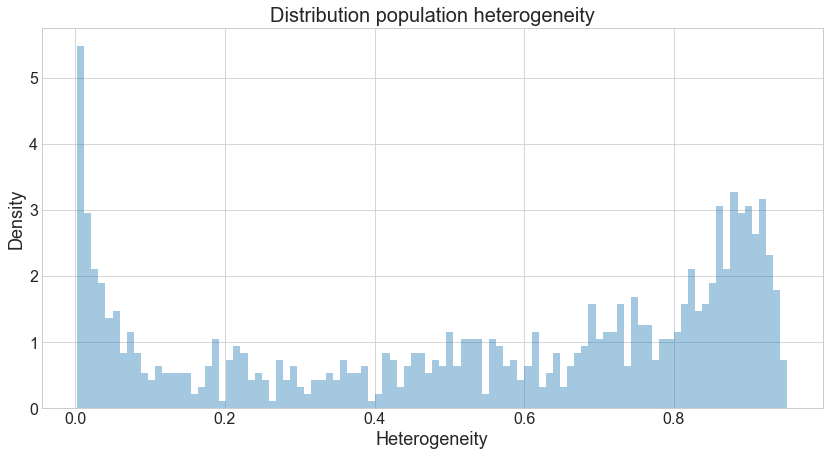

In [7]:
sns.distplot(pop_data_H, bins=100, norm_hist=True, kde=False);
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.show()

## Mutational burden (number of mutations distrbution)

In [8]:
%%time
pop_data_mut_distr = get_mutation_distributions(pop_data, det_lim=1)

CPU times: user 1min 7s, sys: 766 ms, total: 1min 8s
Wall time: 1min 12s


In [9]:
pop_data_mut_distr.to_csv('../simulation_data/Small-1000_sim-selection_3_mut_distr.csv')

In [10]:
pop_data_avg_nmd = pop_data_mut_distr.mean()
pop_data_std_nmd = pop_data_mut_distr.std()

In [11]:
%%time
pop_data_avg_num_mut = avg_num_mutations(pop_data_avg_nmd)

CPU times: user 741 µs, sys: 53 µs, total: 794 µs
Wall time: 783 µs


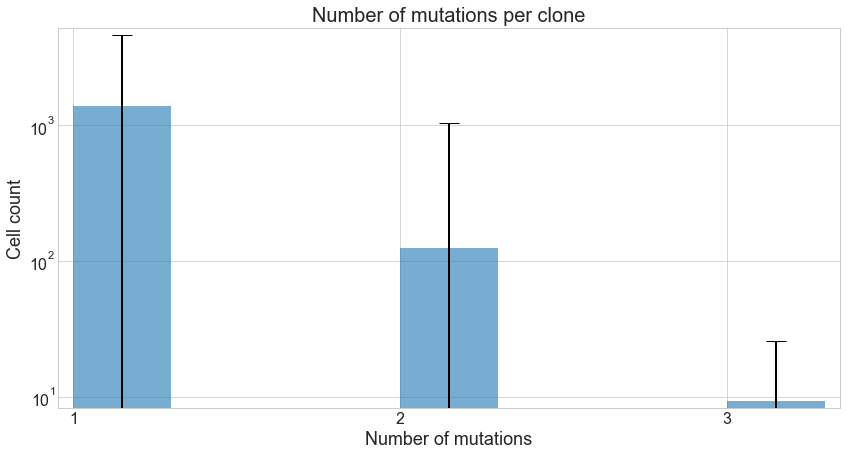

In [12]:
pop_data_errors = pop_data_std_nmd.values

plt.bar(left=pop_data_avg_nmd.index+0.15, height=pop_data_avg_nmd.values, width=0.3, alpha=0.6, 
        align='center', yerr=pop_data_errors, capsize=10, 
        label="mean = %s" %(round(pop_data_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(pop_data_avg_nmd.index));
plt.margins(0.02);
plt.show()

## Total number of mutations

In [13]:
%%time
pop_data_total_m = get_total_mutations(pop_data, det_lim=1)

CPU times: user 510 ms, sys: 9.16 ms, total: 519 ms
Wall time: 519 ms


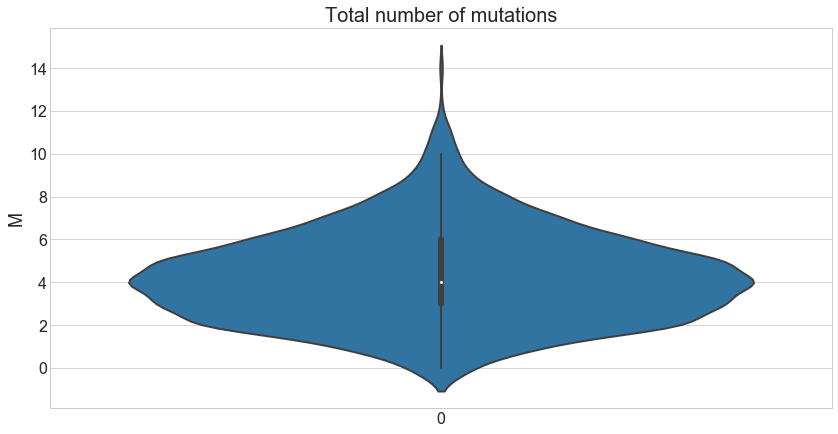

In [14]:
sns.violinplot(data=[pop_data_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [15]:
alpha = 0.3

In [16]:
%%time
pop_data_rec_errors = get_reconstruction_errors(pop_data, alpha, det_lim=1)

CPU times: user 2.55 s, sys: 21.3 ms, total: 2.57 s
Wall time: 2.6 s


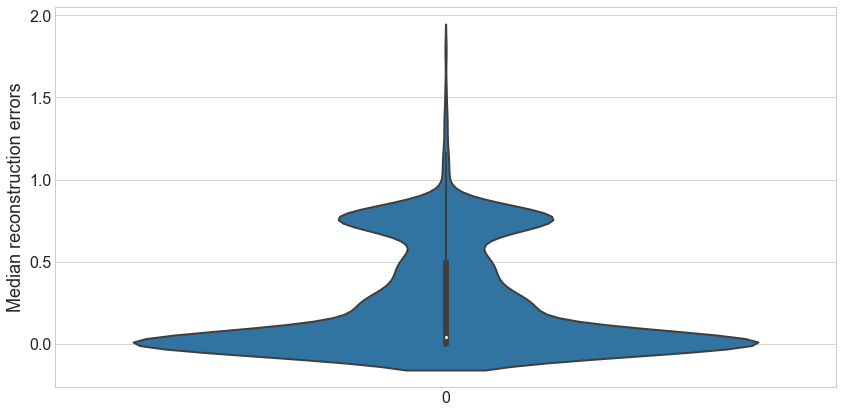

In [17]:
sns.violinplot(data=[pop_data_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.show()

## Export data

In [18]:
d = pd.DataFrame()
d["MaxAFs"] = pop_data_MaxAFs
d["H"] = pop_data_H
d["total_m"] = pop_data_total_m
d["rec_errors"] = pop_data_rec_errors

d.to_csv('../simulation_data/Small-selection_3-1000_sim-Analyzed_data.csv')